In [15]:
import tensorflow as tf

from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist

import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
(x_train, t_train), (x_test, t_test) = mnist.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0

print('x_train.shape = ', x_train.shape, ' , x_test.shape = ', x_test.shape)
print('t_train.shape = ', t_train.shape, ' , t_test.shape = ', t_test.shape)

11493376/11490434 [==============================] - 0s 0us/step
x_train.shape =  (60000, 28, 28)  , x_test.shape =  (10000, 28, 28)
t_train.shape =  (60000,)  , t_test.shape =  (10000,)


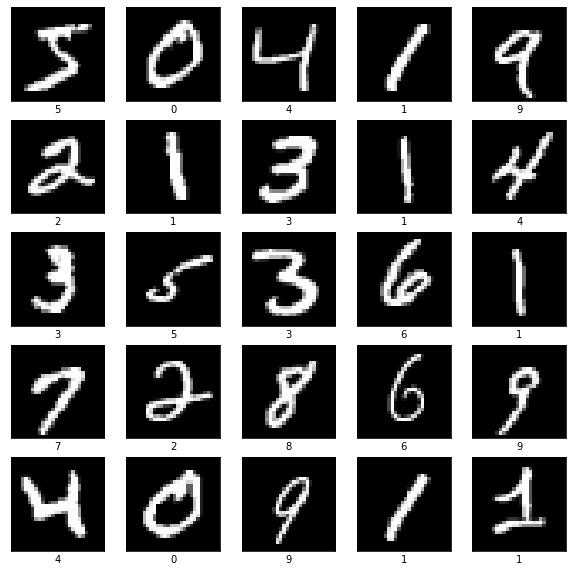

In [3]:
# 데이터 출력

plt.figure(figsize=(10,10))

for index in range(25):

    plt.subplot(5, 5, index+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[index], cmap='gray')
    plt.xlabel(str(t_train[index]))

plt.show()

In [4]:
# hyper paramter

learning_rate = 0.001
epochs = 30
batch_size = 50

In [24]:
# sequential model construction

model = Sequential()

model.add(Conv2D(input_shape=(28,28,1), kernel_size=3, filters=32, strides=(1,1), activation='relu', padding='VALID'))
model.add(MaxPooling2D(pool_size=(2,2), padding='SAME'))
Dropout(0.25)

model.add(Conv2D(kernel_size=3, filters=64, strides=(1,1), activation='relu', padding='VALID'))
model.add(MaxPooling2D(pool_size=(2,2), padding='SAME'))
Dropout(0.25)

model.add(Conv2D(kernel_size=3, filters=128, strides=(1,1), activation='relu',padding='VALID'))

# pooling_3 = MaxPooling2D(pool_size=(2,2), padding='SAME')
# model.add(pooling_3)

model.add(Flatten())

# 출력층 
model.add(Dense(10, activation='softmax'))

In [25]:
# model compile
# one hot encoding 방식이 아니기 때문에, loss=sparse_categorical_crossentropy 정의

model.compile(optimizer=Adam(learning_rate), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [26]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
flatten_2 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)               

In [27]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [28]:
start_time = datetime.now()

hist = model.fit(x_train, t_train, 
                 batch_size=batch_size, epochs=epochs, 
                 validation_data=(x_test, t_test))

end_time = datetime.now()

print('\n\nElapsed Time => ', end_time - start_time)

Epoch 1/30
1200/1200 [==============================] - 4s 3ms/step - loss: 0.1403 - accuracy: 0.9568 - val_loss: 0.0574 - val_accuracy: 0.9810
Epoch 2/30
1200/1200 [==============================] - 3s 3ms/step - loss: 0.0410 - accuracy: 0.9870 - val_loss: 0.0335 - val_accuracy: 0.9893
Epoch 3/30
1200/1200 [==============================] - 3s 3ms/step - loss: 0.0287 - accuracy: 0.9909 - val_loss: 0.0297 - val_accuracy: 0.9907
Epoch 4/30
1200/1200 [==============================] - 3s 3ms/step - loss: 0.0221 - accuracy: 0.9932 - val_loss: 0.0306 - val_accuracy: 0.9899
Epoch 5/30
1200/1200 [==============================] - 3s 3ms/step - loss: 0.0161 - accuracy: 0.9949 - val_loss: 0.0308 - val_accuracy: 0.9915
Epoch 6/30
1200/1200 [==============================] - 3s 3ms/step - loss: 0.0137 - accuracy: 0.9958 - val_loss: 0.0326 - val_accuracy: 0.9904
Epoch 7/30
1200/1200 [==============================] - 3s 3ms/step - loss: 0.0109 - accuracy: 0.9964 - val_loss: 0.0451 - val_accuracy:

In [29]:
# x_test 도 마찬가지로 데이터를 4차원으로 reshape 으로 변환 해주지 않으면 error

model.evaluate(x_test, t_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0463 - accuracy: 0.9931


[0.04632584750652313, 0.9930999875068665]

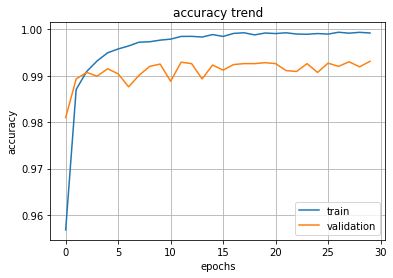

In [30]:
plt.title('accuracy trend')
plt.grid()
plt.xlabel('epochs')
plt.ylabel('accuracy')

plt.plot(hist.history['accuracy'], label='train')
plt.plot(hist.history['val_accuracy'], label='validation')

plt.legend(loc='best')

plt.show()

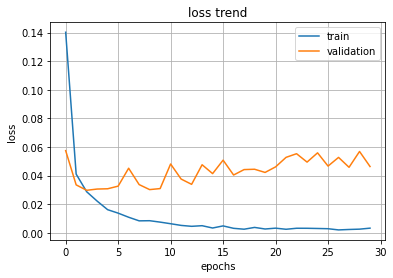

In [31]:
plt.title('loss trend')
plt.grid()
plt.xlabel('epochs')
plt.ylabel('loss')

plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='validation')

plt.legend(loc='best')

plt.show()